In [18]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
df_pd = pd.read_csv("../data/RAW_interactions.csv")
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [15]:
df_pl = pl.read_csv("../data/RAW_interactions.csv")
df_pl.describe()

statistic,user_id,recipe_id,date,rating,review
str,f64,f64,str,f64,str
"""count""",1.132367e6,1.132367e6,"""1132367""",1.132367e6,"""1132202"""
"""null_count""",0.0,0.0,"""0""",0.0,"""165"""
"""mean""",1.3843e8,160897.208164,null,4.411016,null
"""std""",5.0143e8,130398.719639,null,1.264752,null
"""min""",1533.0,38.0,"""2000-01-25""",0.0,""" This is good, just what I wa…"
"""25%""",135470.0,54257.0,null,4.0,null
"""50%""",330937.0,120547.0,null,5.0,null
"""75%""",804550.0,243852.0,null,5.0,null
"""max""",2.0024e9,537716.0,"""2018-12-20""",5.0,"""���������������� Best recipe !…"


In [17]:
df_pl.head()

user_id,recipe_id,date,rating,review
i64,i64,str,i64,str
38094,40893,"""2003-02-17""",4,"""Great with a salad. Cooked on …"
1293707,40893,"""2011-12-21""",5,"""So simple, so delicious! Great…"
8937,44394,"""2002-12-01""",4,"""This worked very well and is E…"
126440,85009,"""2010-02-27""",5,"""I made the Mexican topping and…"
57222,85009,"""2011-10-01""",5,"""Made the cheddar bacon topping…"


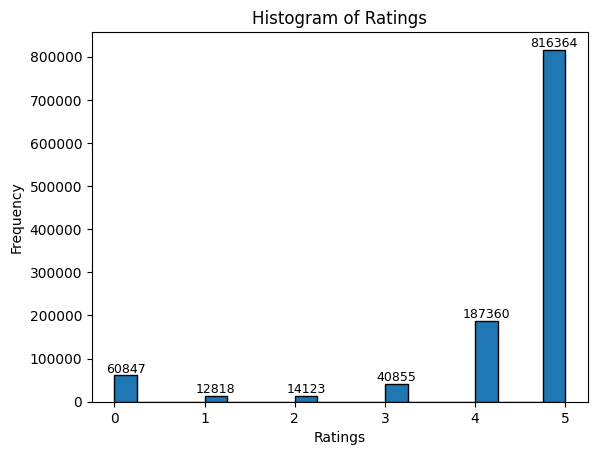

In [24]:
import polars as pl
import matplotlib.pyplot as plt

rating_data = df_pl["rating"].to_list()

counts, bins, patches = plt.hist(rating_data, bins=20, edgecolor='black')

for i in range(len(counts)):
    if counts[i] > 0: 
        plt.text(bins[i] + (bins[1] - bins[0])/2, counts[i] + 0.5, 
                str(int(counts[i])), 
                ha='center', va='bottom', fontsize=9)

plt.title("Histogram of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

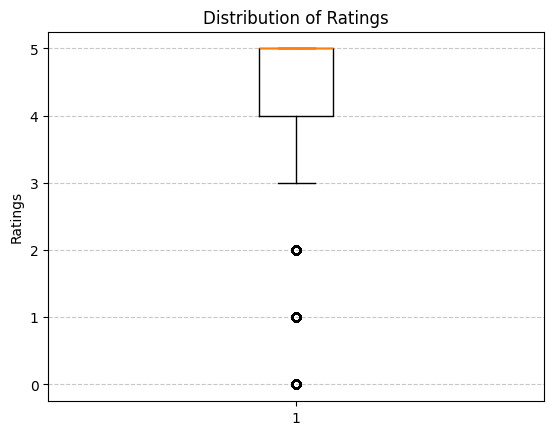

In [27]:
plt.boxplot(df_pl["rating"].to_list())
plt.title("Distribution of Ratings")
plt.ylabel("Ratings")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()